# Лабораторная работа №6

### Выполнил Рыбаков Владислав, БПМ201, 30 вариант

Задания 6.1.30, 6.5.8, 6.7.6, 6.9.15

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 6.1.30

Функция $y=f(x)$ задана таблицей значений $y_0, y_1, ..., y_n$ в точках $x_0, x_1, ..., x_n$. Используя метод
наименьших квадратов (МНК), найти многочлен $Pm(x) = a_0 + a_1 x + ... + a_n x_n$. наилучшего
среднеквадратичного приближения оптимальной степени $m=m*$.

In [2]:
x = np.array([-0.8, -0.475, -0.15, 0.175, 0.5, 0.825, 1.15, 1.475, 1.8])
y = np.array([3.503, -0.55, -1.681, -1.263, 0.421, 1.301, 2.551, 2.937, 2.097])

In [3]:
def mnk(x, y, m):
    n = len(x) - 1
    b = np.zeros(m + 1)
    G = np.zeros((m + 1, m + 1))
    for j in range(m + 1):
        b[j] = sum(y[i]*(x[i])**j for i in range(n + 1))
        for k in range(m + 1):
            G[j, k] = sum((x[i])**(j+k) for i in range(n + 1))
    a = np.linalg.solve(G, b)
    return a

In [4]:
def P(a, m, t):
    return sum(a[i]*t**i for i in range(m + 1))

In [5]:
def sigma(a, n, m):
    return np.sqrt(sum((P(a, m, x[i]) - y[i])**2 for i in range(n) ) /(n-m))

In [6]:
P0 = mnk(x, y, 0)
P1 = mnk(x, y, 1)
P2 = mnk(x, y, 2)
P3 = mnk(x, y, 3)
P4 = mnk(x, y, 4)
P5 = mnk(x, y, 5)
P6 = mnk(x, y, 6)
P7 = mnk(x, y, 7)
P8 = mnk(x, y, 8)

In [7]:
sig = np.zeros(len(x))
for i in range(len(x)):
    sig[i] = sigma(mnk(x, y, i), len(x), i)
    print('m', i, ' = ', sig[i], sep='')

m0 = 1.7873681735038032
m1 = 1.7520414689806225
m2 = 1.4933310105639461
m3 = 0.29729014591166786
m4 = 0.18775013111236907
m5 = 0.1887157628066654
m6 = 0.19548299026257904
m7 = 0.23813723133508718
m8 = 1.4410751550160742e-09


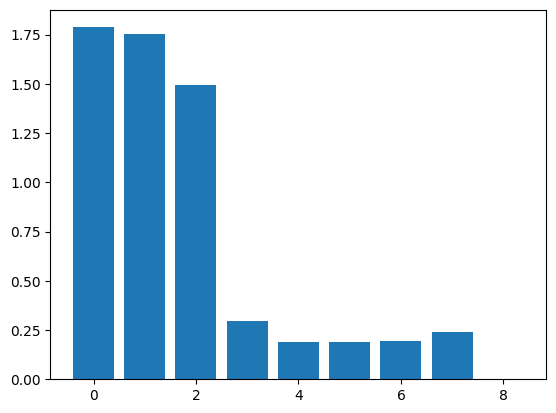

In [8]:
index = np.arange(len(sig))
plt.bar(index, sig);

**Отсюда, оптимальная степень $m = 4$**

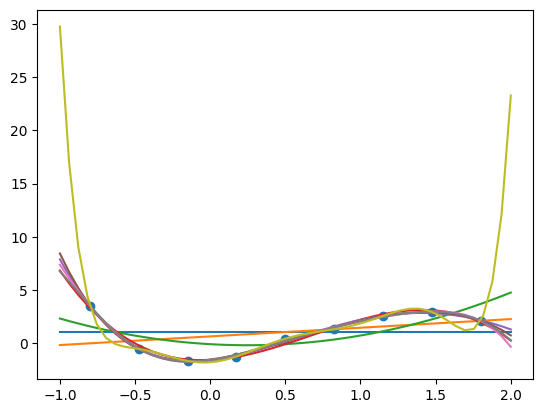

In [9]:
xpl = np.linspace(-1, 2)

plt.scatter(x, y)
plt.plot(xpl, P(P0, 0, xpl))
plt.plot(xpl, P(P1, 1, xpl))
plt.plot(xpl, P(P2, 2, xpl))
plt.plot(xpl, P(P3, 3, xpl))
plt.plot(xpl, P(P4, 4, xpl))
plt.plot(xpl, P(P5, 5, xpl))
plt.plot(xpl, P(P6, 6, xpl))
plt.plot(xpl, P(P7, 7, xpl))
plt.plot(xpl, P(P8, 8, xpl))

### Задание 6.5.8

Известно, что $y= C_1 \sin(2\pi x)+ C_2 \cos(\pi x)$, где коэффициенты $C_1$ и $C_2$ подлежат определению.
Используя метод наименьших квадратов, определить $C_1$ и $C_2$.

In [10]:
x = np.zeros(21)
for i in range(21):
    x[i] = -1 + 0.1 * i
y = np.array([-2.32, -0.9861, 0.0841, 0.583,0.4912, 0.002, -0.4925, -0.593, -0.0841, 0.9852, 2.315, 3.3891, 3.8051, 3.2961, 1.9129, -0.003, -1.913, -3.2963, -3.8051, -3.3892, -2.285])

In [11]:
P = np.column_stack((np.sin(2 * np.pi * x), np.cos(np.pi * x)))
c1, c2 = np.dot(np.linalg.inv(np.dot(P.T, P)), np.dot(P.T, y))
print("Коэффициент c1:", c1)
print("Коэффициент c2:", c2)

Коэффициент c1: 2.043838110473329
Коэффициент c2: 2.302185155367624


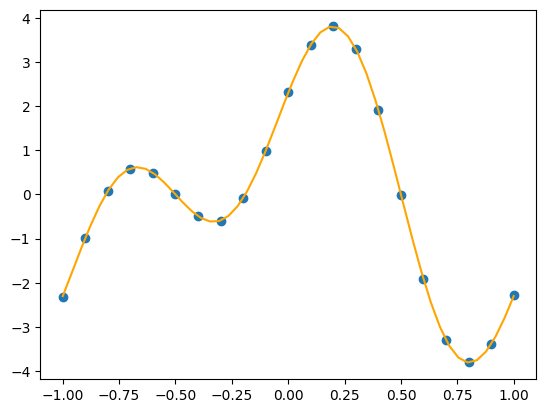

In [12]:
xpl = np.linspace(-1, 1)
plt.scatter(x, y)
plt.plot(xpl, c1 * np.sin(2 * np.pi * xpl) + c2 * np.cos(np.pi * xpl), color='orange')

### Задание 6.7.6

Дана кусочно-гладкая функция $y= |\cos(x)|, \text{ }[0,\pi]$. Сравнить качество приближения функции кусочно-линейной
и глобальной интерполяциями.

In [68]:
a = 0
b = np.pi
k = 10

In [69]:
def func(x):
    return np.abs(np.cos(x))

In [70]:
x = np.linspace(a, b, k)
y = func(x)

In [71]:
# функция, вычисляющая значение интерполяционного многочлена 1-ой степени по точкам
def interpolate(x, x0, y0, x1, y1):
    a1 = (y1-y0)/(x1-x0)
    a0 = y0 - a1 * x0
    return a0 + a1*x

In [72]:
x_3 = np.linspace(a, b, 3*k)
y_lin = np.zeros(len(x_3))

In [73]:
for i in range(k-1):
    for j in range(3):
        idx = i*3 + j
        xj = x[i] + (j/2)
        y_lin[idx] = interpolate(xj, x[i], y[i], x[i+1], y[i+1])

In [74]:
from scipy import interpolate
f_interp = interpolate.interp1d(x, y, kind='cubic')
y_global = f_interp(x_3)

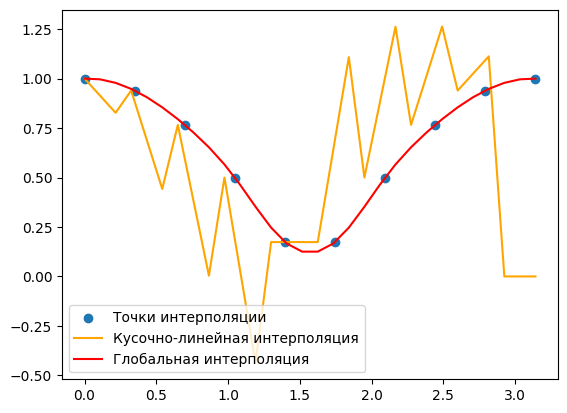

In [75]:
plt.scatter(x, y, label="Точки интерполяции")
plt.plot(x_3, y_lin, color='orange', label='Кусочно-линейная интерполяция')
plt.plot(x_3, y_global,color='red', label='Глобальная интерполяция')
plt.legend()
plt.show()

In [76]:
delta_lin = np.abs(func(x_3) - y_lin)
delta_global = np.abs(func(x_3) - y_global)

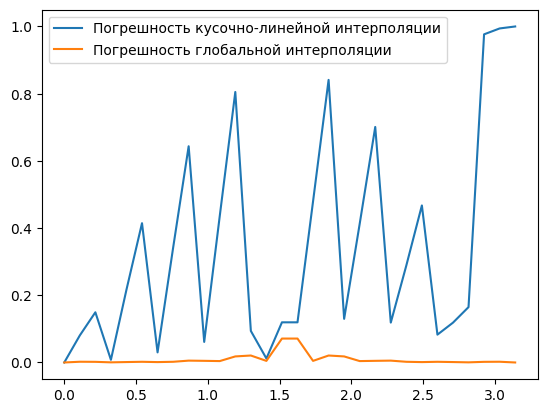

In [77]:
plt.plot(x_3,delta_lin, label='Погрешность кусочно-линейной интерполяции')
plt.plot(x_3,delta_global, label='Погрешность глобальной интерполяции')
plt.legend()

### Задание 6.9.15

Дана функция $y=f(x) = x \sin(x^2)$. Приблизить $x \sin(x^2)$ на отрезке $[0, 5]$ методом глобальной интерполяции и
указанным в индивидуальном варианте сплайном(локальный). На одном чертеже построить графики приближающей
функции и функции $x \sin(x^2)$. Сравнить качество приближения при разном количестве узлов интерполяции.

In [56]:
from scipy.interpolate import interp1d, splrep, splev

In [78]:
def f(x):
    return x * np.sin(x**2)

x = np.linspace(0, 5, 100)

In [79]:
# Глобальная интерполяция
xi = np.linspace(0, 5, 10)
yi = f(xi)

f_interp = interp1d(xi, yi, kind='cubic')
y_interp = f_interp(x)


In [82]:
# Локальный сплайн
xs = np.linspace(0, 5, 10)
ys = f(xs)

spl = splrep(xs, ys, k=3)
y_spline = splev(x, spl)


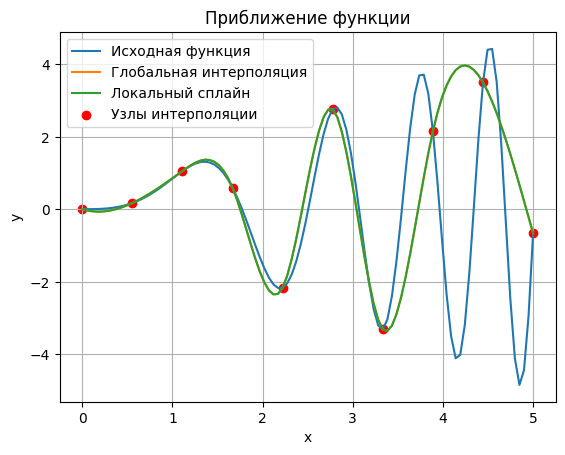

In [83]:
plt.plot(x, f(x), label='Исходная функция')
plt.plot(x, y_interp, label='Глобальная интерполяция')
plt.plot(x, y_spline, label='Локальный сплайн')
plt.scatter(xi, yi, c='red', label='Узлы интерполяции')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Приближение функции')
plt.grid(True)
plt.show()


**Как видим, глобальная интерполяция и локальный сплайн не отличаются.**

In [65]:
# Глобальная интерполяция
xi = np.linspace(0, 5, 20)
yi = f(xi)

f_interp = interp1d(xi, yi, kind='cubic')
y_interp = f_interp(x)


In [66]:
# Локальный сплайн
xs = np.linspace(0, 5, 20)
ys = f(xs)

spl = splrep(xs, ys, k=3)
y_spline = splev(x, spl)


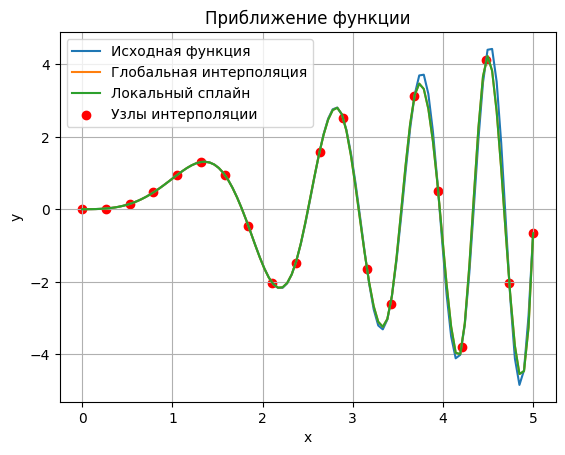

In [67]:
plt.plot(x, f(x), label='Исходная функция')
plt.plot(x, y_interp, label='Глобальная интерполяция')
plt.plot(x, y_spline, label='Локальный сплайн')
plt.scatter(xi, yi, c='red', label='Узлы интерполяции')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Приближение функции')
plt.grid(True)
plt.show()


**При увеличении количества точек, точность приближения функции увеличивается.**